In [1]:
import sys
sys.path.append("..")
from tools import prepare_data
import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
loader = prepare_data.DataLoader("../dataset","test")

# Create image_paths

In [6]:
	# image_paths file format: [ path of image_i for image_i in images ]
	# the order of images in image_paths should be the same with gt_file

In [13]:
import os.path
image_paths = [os.path.abspath(loader.getImPath(i)) for i in xrange(loader.getNumImgs())]
image_paths

[u'/root/shared/drnet_cvpr2017/dataset/images/test/3845770407_1a8cd41230_b.jpg',
 u'/root/shared/drnet_cvpr2017/dataset/images/test/6279585054_1f9d450f35_b.jpg',
 u'/root/shared/drnet_cvpr2017/dataset/images/test/2584263186_3969c8a53e_b.jpg',
 u'/root/shared/drnet_cvpr2017/dataset/images/test/4418514401_cd86bc8e53_b.jpg',
 u'/root/shared/drnet_cvpr2017/dataset/images/test/8329270_d36f3afdc8_o.jpg',
 u'/root/shared/drnet_cvpr2017/dataset/images/test/4150090398_6a7d30fb0a_b.jpg',
 u'/root/shared/drnet_cvpr2017/dataset/images/test/3825256896_c2d83ba5b9_b.jpg',
 u'/root/shared/drnet_cvpr2017/dataset/images/test/174196276_8a9cc595cf_b.jpg',
 u'/root/shared/drnet_cvpr2017/dataset/images/test/9488063880_8321ea21a8_b.jpg',
 u'/root/shared/drnet_cvpr2017/dataset/images/test/9263069366_e7dc652ed7_b.jpg',
 u'/root/shared/drnet_cvpr2017/dataset/images/test/5064573447_7da6b6f30f_b.jpg',
 u'/root/shared/drnet_cvpr2017/dataset/images/test/5219053386_16a6151347_b.jpg',
 u'/root/shared/drnet_cvpr2017/d

In [ ]:

# gt file format: [ gt_label, gt_box ]
	# 	gt_label: list [ gt_label(image_i) for image_i in images ]
	# 		gt_label(image_i): numpy.array of size: num_instance x 3
	# 			instance: [ label_s, label_r, label_o ]
	# 	gt_box: list [ gt_box(image_i) for image_i in images ]
	#		gt_box(image_i): numpy.array of size: num_instance x 2 x 4
	#			instance: [ [x1_s, y1_s, x2_s, y2_s], 
	#				    [x1_o, y1_o, x2_o, y2_o]]

In [16]:
loader.getRels(0)[0]

{u'objBox': [292, 529, 342, 569],
 u'phrase': [u'person', u'wear', u'shirt'],
 u'subBox': [192, 885, 275, 568]}

In [81]:
# TODO visualize box to see the order of box
from pprint import pprint

{u'objBox': [292, 529, 342, 569],
 u'phrase': [u'person', u'wear', u'shirt'],
 u'subBox': [192, 885, 275, 568]}


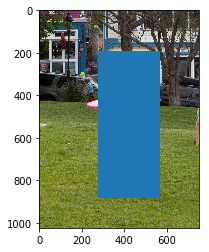

In [102]:
imshow(imread(loader.getImPath(0)))
rel = loader.getRels(0)[0]
pprint(rel)
box = array(rel["subBox"])
y,y2,x,x2 = box
gca().add_patch(
    Rectangle((x,y),x2-x,y2-y)
)

In [103]:
def gen_gt():
    order = [2,0,3,1]
    for i,img in enumerate(image_paths):
        rels = loader.getRels(i)
        labels = zeros(shape=(len(rels),3),dtype=int)
        boxes = zeros(shape=(labels.shape[0],2,4),dtype=int)
        for j,rel in enumerate(rels):
            subj,pred,obj = rel["phrase"]
            subj = loader.objMapping[subj]
            pred = loader.relMapping[pred]
            obj = loader.objMapping[obj]
            labels[j] = subj,pred,obj
            boxes[j,0] = array(rel["subBox"])[order]
            boxes[j,1] = array(rel["objBox"])[order]
        yield labels,boxes
gt = [list(e) for e in list(zip(*list(gen_gt())))]

In [104]:
import cPickle as pkl
with open("/root/shared/drnet_cvpr2017/dataset/test_image_paths.json","wb") as f:
    json.dump(image_paths,f)
with open("/root/shared/drnet_cvpr2017/dataset/test_predicate_gt.pkl","wb") as f:
    pkl.dump(gt,f)

In [105]:
gt[1][0,0,:]

TypeError: list indices must be integers, not tuple

In [111]:
from tqdm import tnrange
for i in trange(199):
    pass


100%|██████████| 199/199 [00:00<00:00, 765047.20it/s]


In [126]:
with open("../test_predicate_result.pkl") as f:
    pred,pred_boxes = pkl.load(f)

In [133]:
pred[3][0]

array([  0.44255668,   1.        ,   1.        ,  14.        ,
         0.        ,   1.        ])

In [2]:
with open("../reltest.json") as f:
    data = json.load(f)

In [3]:
data[0]

{u'aBBox': [275, 192, 569, 886],
 u'aLabel': 1,
 u'bBBox': [342, 292, 570, 530],
 u'bLabel': 7,
 u'imPath': u'/root/shared/drnet_cvpr2017/dataset/images/test/3845770407_1a8cd41230_b.jpg',
 u'rBBox': [265, 182, 580, 896],
 u'rLabel': 1}

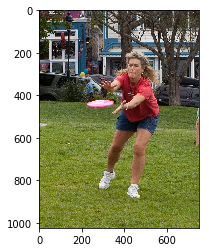

In [6]:
imshow(imread(data[2]["imPath"]))